In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crop_yield.csv')

In [3]:
df.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [4]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  str    
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  str    
 3   State            19689 non-null  str    
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), str(3)
memory usage: 1.5 MB


In [6]:
df['Crop'].unique()

<StringArray>
[             'Arecanut',             'Arhar/Tur',           'Castor seed',
              'Coconut ',          'Cotton(lint)',          'Dry chillies',
                  'Gram',                  'Jute',               'Linseed',
                 'Maize',                 'Mesta',            'Niger seed',
                 'Onion',    'Other  Rabi pulses',                'Potato',
     'Rapeseed &Mustard',                  'Rice',               'Sesamum',
         'Small millets',             'Sugarcane',          'Sweet potato',
               'Tapioca',               'Tobacco',              'Turmeric',
                 'Wheat',                 'Bajra',          'Black pepper',
              'Cardamom',             'Coriander',                'Garlic',
                'Ginger',             'Groundnut',            'Horse-gram',
                 'Jowar',                  'Ragi',             'Cashewnut',
                'Banana',              'Soyabean',                'Barley'

Text(0.5, 1.0, 'Average Annual Rainfall by State')

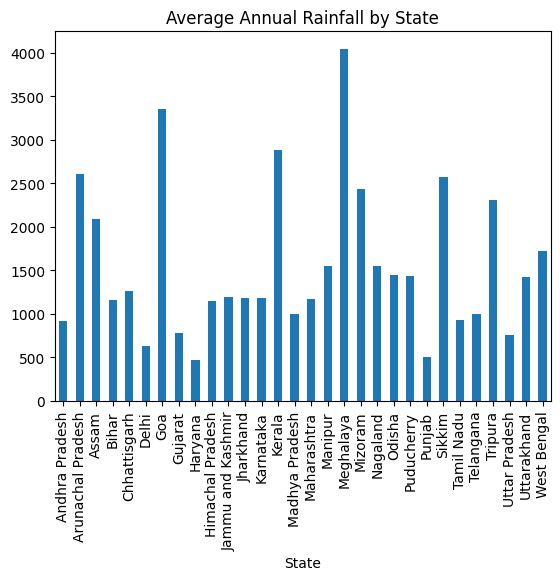

In [7]:
df.groupby('State')['Annual_Rainfall'].mean().plot(kind='bar')
plt.title('Average Annual Rainfall by State')

Text(0.5, 1.0, 'Average Annual Rainfall by Season')

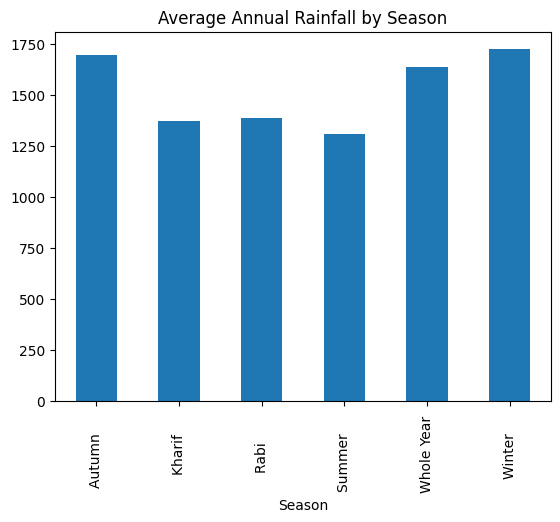

In [8]:
df.groupby('Season')['Annual_Rainfall'].mean().plot(kind='bar')
plt.title('Average Annual Rainfall by Season')

Text(0.5, 1.0, 'Total Area Cultivated by State')

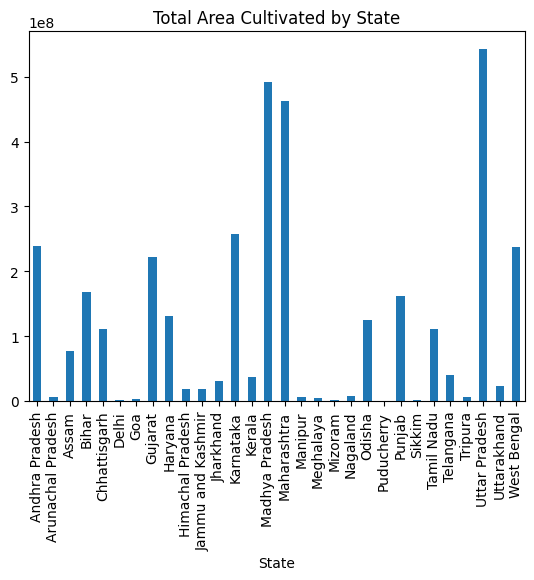

In [9]:
df.groupby('State')['Area'].sum().plot(kind='bar')
plt.title('Total Area Cultivated by State')

Text(0.5, 1.0, 'Total Crop Production by State')

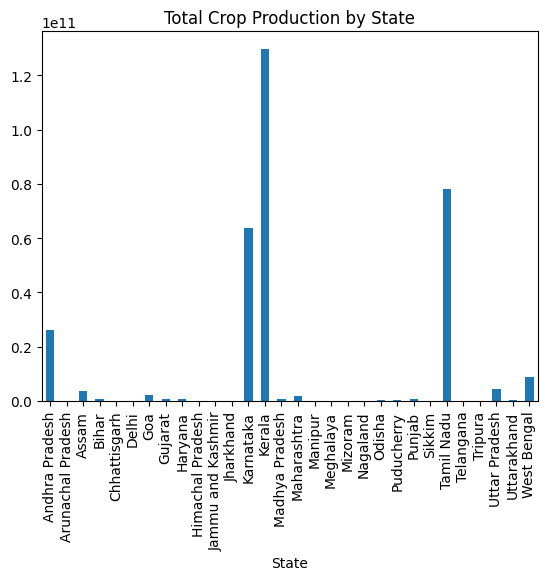

In [10]:
df.groupby('State')['Production'].sum().plot(kind='bar')
plt.title('Total Crop Production by State')

Text(0.5, 1.0, 'Number of Unique Crops Cultivated by State')

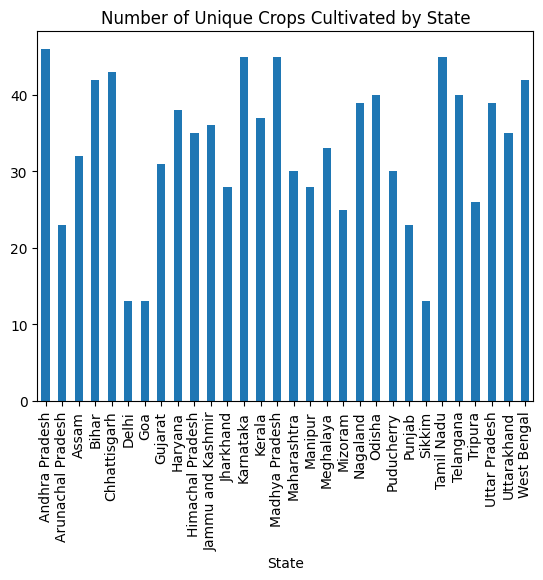

In [11]:
df.groupby('State')['Crop'].nunique().plot(kind='bar')
plt.title('Number of Unique Crops Cultivated by State')

In [12]:
production_by_state_crop = df.groupby(['State', 'Crop'])['Production'].sum().unstack(fill_value=0)
print(production_by_state_crop)

Crop               Arecanut  Arhar/Tur     Bajra    Banana    Barley  \
State                                                                  
Andhra Pradesh        28388    3781408   1824665  40143311         0   
Arunachal Pradesh         0       2725         0         0         0   
Assam               1341635     112591         0  14924443         0   
Bihar                     0    1038354     76524   2885145    454227   
Chhattisgarh              0     542750    435401         0     50154   
Delhi                     0       1164     75132         0      3636   
Goa                   36000          0         0    284022         0   
Gujarat                   0    5984735  25840739  40633317         0   
Haryana                   0     372739  19301200         0   2429200   
Himachal Pradesh          0        750      3850         0    639842   
Jammu and Kashmir         0         13    171166         0     92595   
Jharkhand                 0    1247468       635         0      

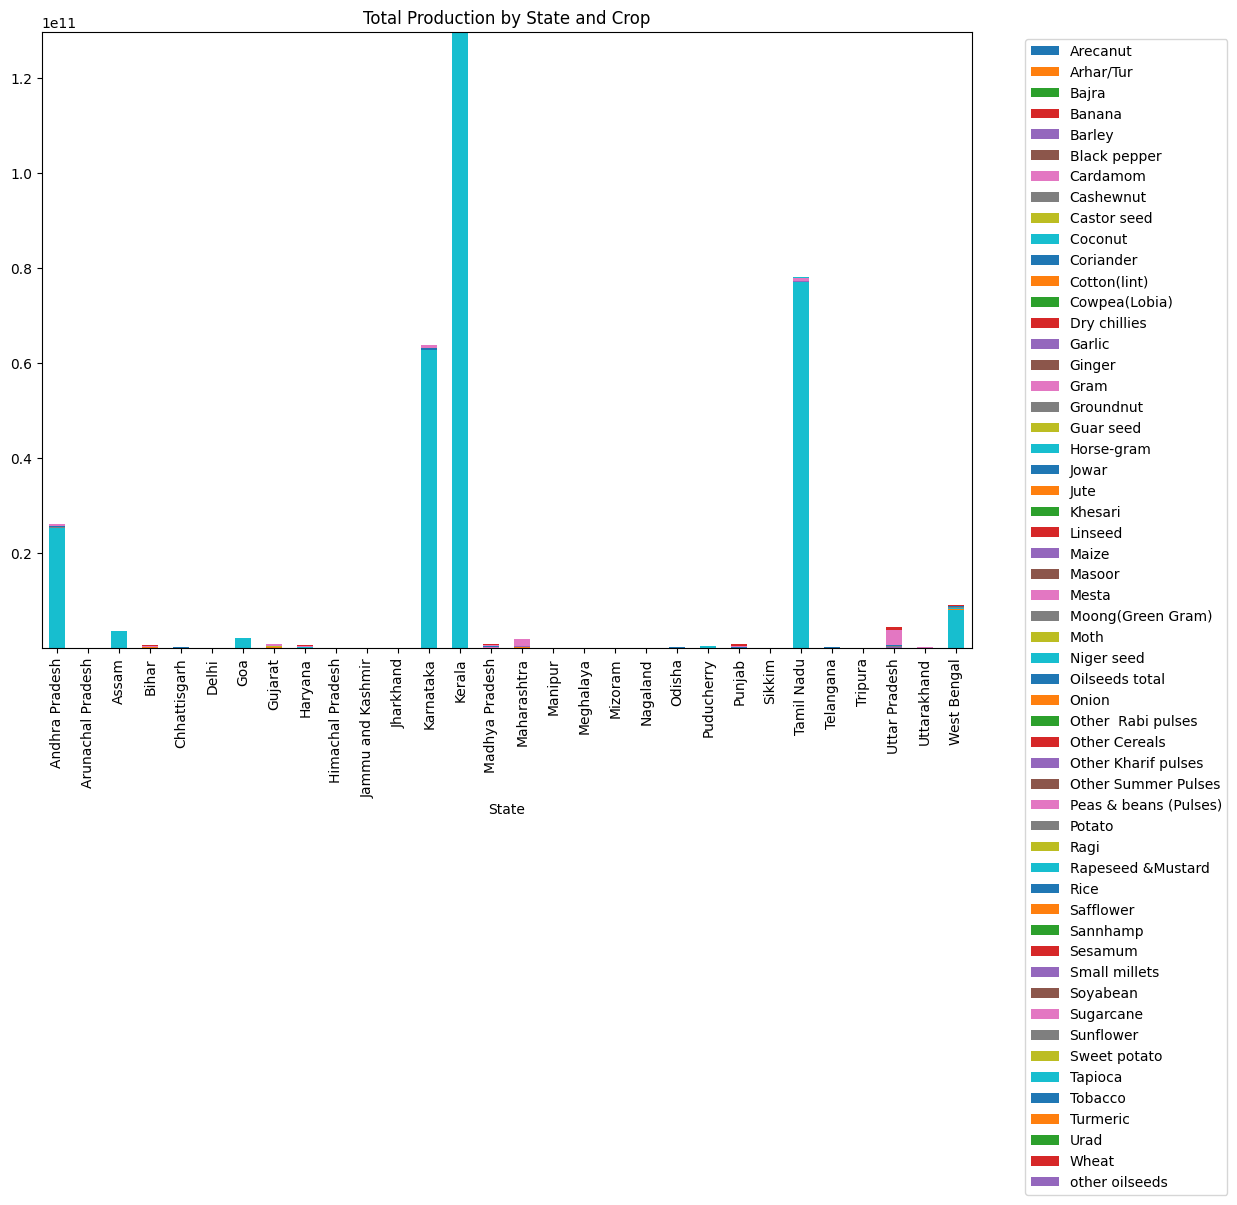

In [13]:
df.groupby(['State', 'Crop'])['Production'].sum().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Production by State and Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [14]:
df.corr(numeric_only=True)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


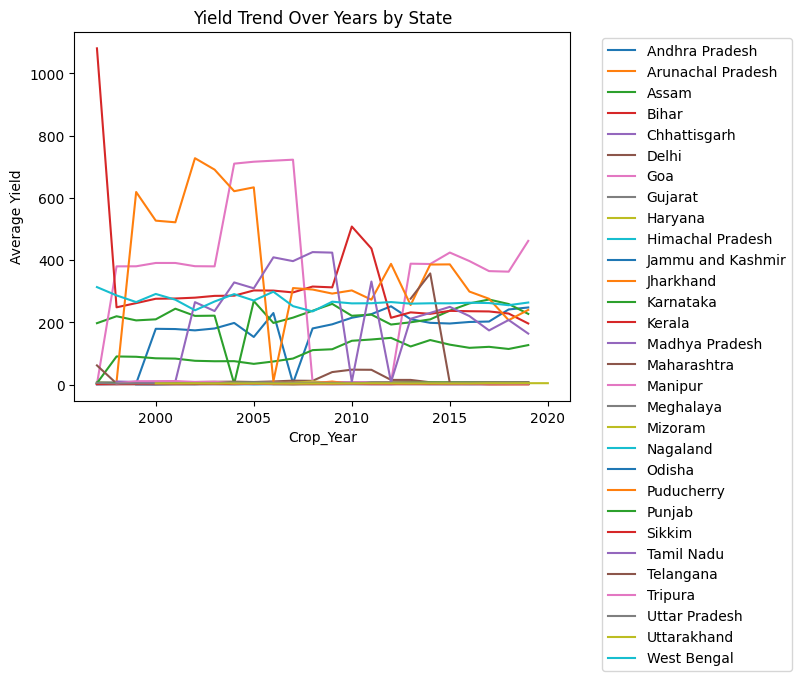

In [15]:
df.groupby(['Crop_Year', 'State'])['Yield'].mean().unstack().plot()
plt.title('Yield Trend Over Years by State')
plt.ylabel('Average Yield')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

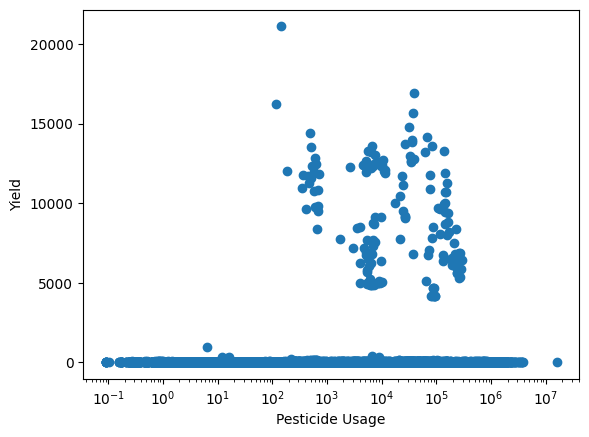

In [16]:
plt.scatter(df['Pesticide'], df['Yield'])
plt.xscale('log')
plt.xlabel('Pesticide Usage')
plt.ylabel('Yield')
plt.show()

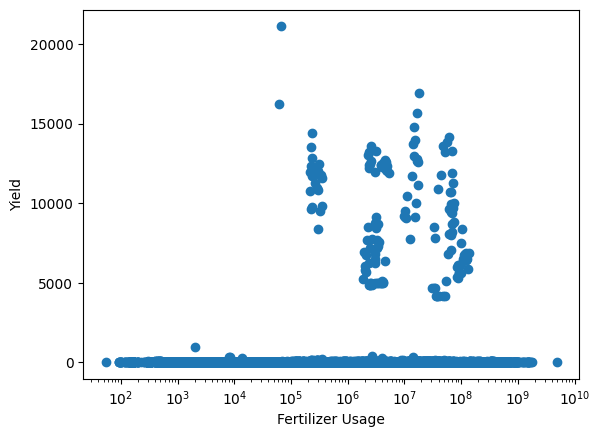

In [17]:
plt.scatter(df['Fertilizer'], df['Yield'])
plt.xscale('log')
plt.xlabel('Fertilizer Usage')
plt.ylabel('Yield')
plt.show()

<Axes: xlabel='Season'>

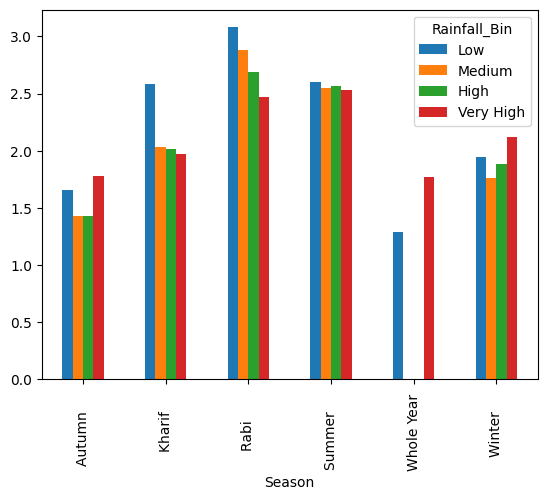

In [18]:
df['Rainfall_Bin'] = pd.qcut(df['Annual_Rainfall'], 4,labels=['Low', 'Medium', 'High', 'Very High'])
crop_df = df[df['Crop'] == 'Rice']
crop_df.groupby(['Season','Rainfall_Bin'])['Yield'].mean().unstack().plot(kind='bar')

<Axes: xlabel='Season'>

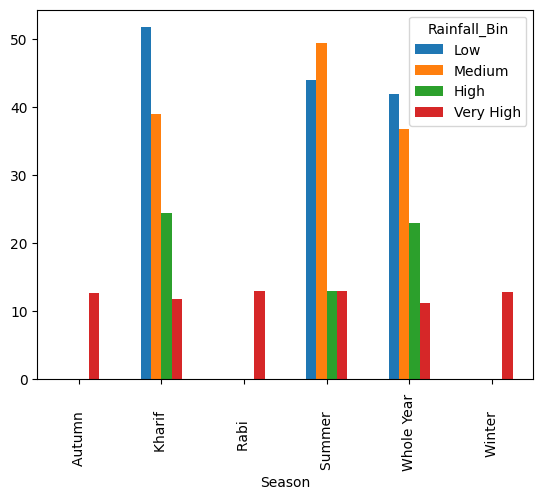

In [19]:
crop_df = df[df['Crop'] == 'Banana']
crop_df.groupby(['Season','Rainfall_Bin'])['Yield'].mean().unstack().plot(kind='bar')

<Axes: xlabel='Season'>

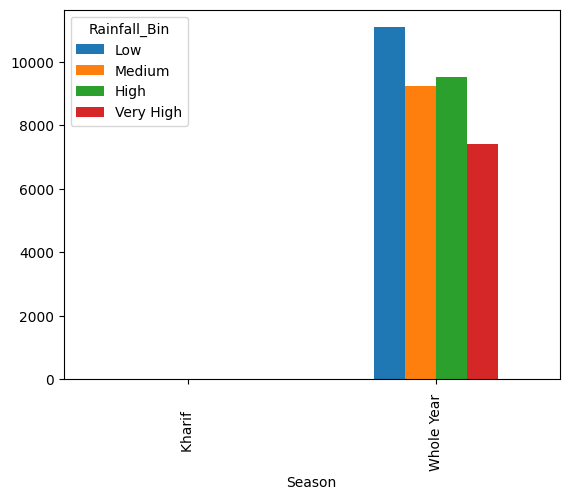

In [20]:
df['Crop'] = df['Crop'].str.strip()      # remove extra spaces
df['Crop'] = df['Crop'].str.lower()  
crop_df = df[df['Crop'] == 'coconut']
crop_df.groupby(['Season', 'Rainfall_Bin'])['Yield'].mean().unstack().plot(kind='bar')

In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Crop             19689 non-null  str     
 1   Crop_Year        19689 non-null  int64   
 2   Season           19689 non-null  str     
 3   State            19689 non-null  str     
 4   Area             19689 non-null  float64 
 5   Production       19689 non-null  int64   
 6   Annual_Rainfall  19689 non-null  float64 
 7   Fertilizer       19689 non-null  float64 
 8   Pesticide        19689 non-null  float64 
 9   Yield            19689 non-null  float64 
 10  Rainfall_Bin     19689 non-null  category
dtypes: category(1), float64(5), int64(2), str(3)
memory usage: 1.5 MB


In [ ]:
df['Yield_log'] = np.log1p(df['Yield'])
df['Pesticide_log'] = np.log1p(df['Pesticide'])
df['Fertilizer_log'] = np.log1p(df['Fertilizer'])

In [23]:
df.to_csv('cleaned_crop_yield.csv', index=False)